In [2]:
# --- 1. SETUP: IMPORT LIBRARIES ---
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [3]:
# --- 2. DATA LOADING ---
# Assuming your script is in the root folder, and the data is in './input/...'
# Adjust this path if your folder structure is different.
DATASET_PATH = os.path.join("input", "Data", "genres_original")
OUTPUT_DIR = "outputs"
PLOTS_DIR = os.path.join(OUTPUT_DIR, "visualizations")
os.makedirs(PLOTS_DIR, exist_ok=True)

# Check if the path exists to avoid errors
if not os.path.exists(DATASET_PATH):
    print(f"ERROR: The dataset path does not exist: {DATASET_PATH}")
    print("Please make sure the 'input' folder is in the same directory as your script.")
else:
    filepaths = []
    labels = []
    genres = [g for g in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, g))]

    for genre in genres:
        genre_path = os.path.join(DATASET_PATH, genre)
        for filename in os.listdir(genre_path):
            if filename.endswith('.wav'):
                filepaths.append(os.path.join(genre_path, filename))
                labels.append(genre)

    df = pd.DataFrame({'label': labels, 'filepath': filepaths})
    print("--- DataFrame successfully created ---")
    print(df.head())

--- DataFrame successfully created ---
   label                                          filepath
0  blues  input\Data\genres_original\blues\blues.00000.wav
1  blues  input\Data\genres_original\blues\blues.00001.wav
2  blues  input\Data\genres_original\blues\blues.00002.wav
3  blues  input\Data\genres_original\blues\blues.00003.wav
4  blues  input\Data\genres_original\blues\blues.00004.wav



--- Class Distribution Analysis ---
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13352\3212621699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis_r')


Plot saved to: outputs\visualizations\1_class_distribution.png


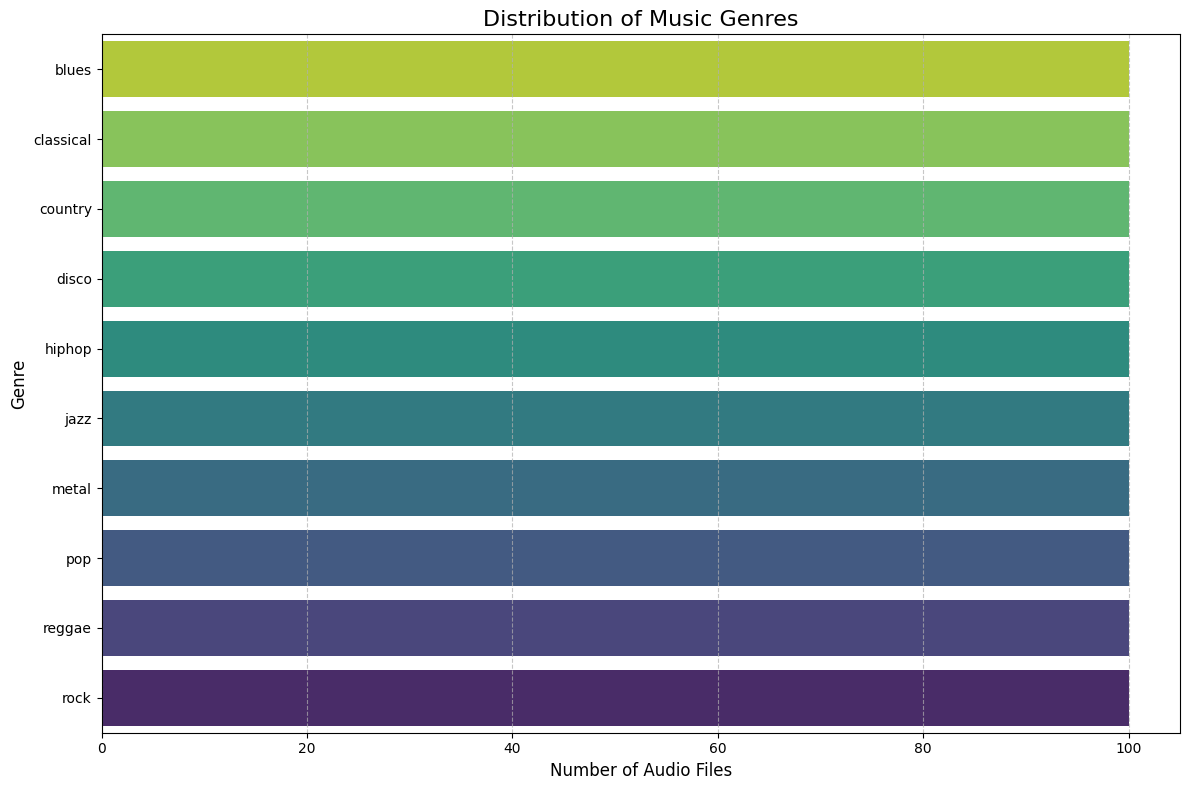

In [4]:
# This code block assumes 'df' was created in the previous block

print("\n--- Class Distribution Analysis ---")
print(df['label'].value_counts())

plt.figure(figsize=(12, 8))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis_r')
plt.title('Distribution of Music Genres', fontsize=16)
plt.xlabel('Number of Audio Files', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Add these lines right before plt.show()
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "1_class_distribution.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory


--- Waveform and Spectrogram Visualization for a 'Classical' Sample ---
Analyzing File: classical.00005.wav
Sample Rate: 22050 Hz
Plot saved to: outputs\visualizations\2_waveform.png


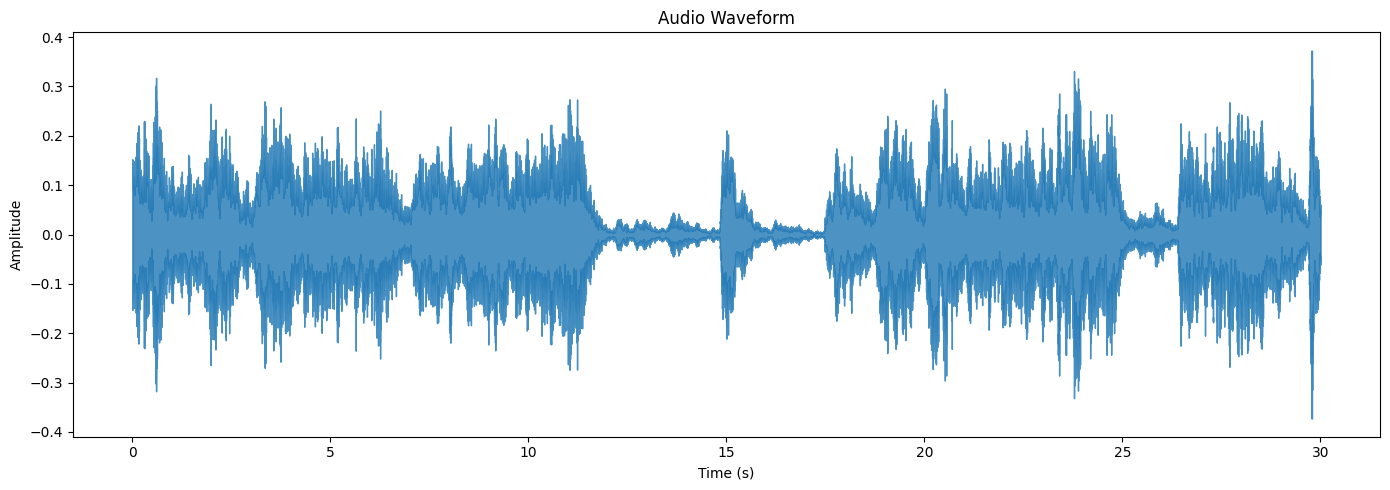

Plot saved to: outputs\visualizations\3_mel_spectrogram.png


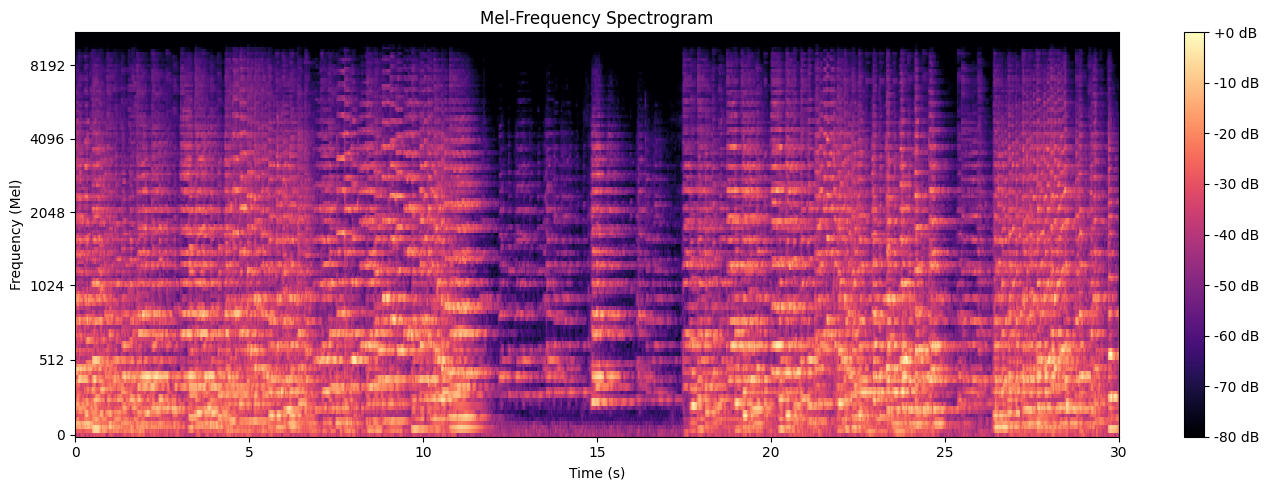

In [5]:
# This code block assumes 'df' was created

print("\n--- Waveform and Spectrogram Visualization for a 'Classical' Sample ---")

# Let's pick a classical file for a detailed look
example_file = df[df['label']=='classical'].iloc[5]['filepath']
y, sr = librosa.load(example_file)

print(f"Analyzing File: {os.path.basename(example_file)}")
print(f"Sample Rate: {sr} Hz")

# --- Waveform ---
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Audio Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "2_waveform.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory

# --- Mel Spectrogram ---
# A Mel spectrogram is the most common visual representation for audio ML tasks.
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max) # Convert to decibels (dB)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency Spectrogram')
plt.ylabel('Frequency (Mel)')
plt.xlabel('Time (s)')
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "3_mel_spectrogram.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory


--- Detailed Feature Visualization for the Sample ---
Plot saved to: outputs\visualizations\4_zcr.png


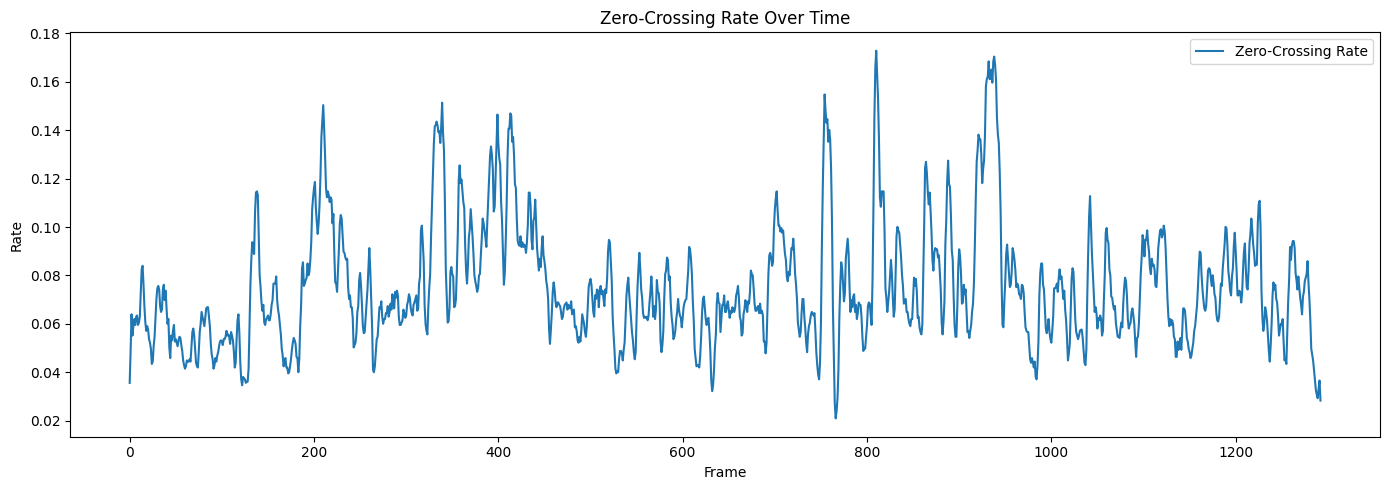

ZCR often has higher values for genres like rock/metal (noisy) and lower for classical.
Plot saved to: outputs\visualizations\5_spectral_centroid.png


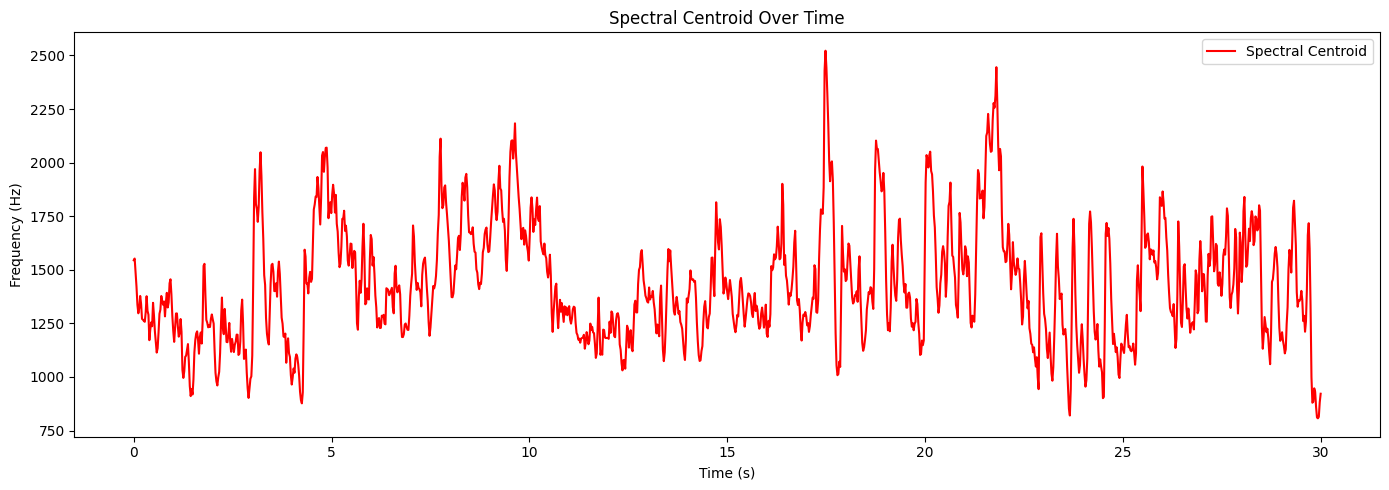

Higher centroid values mean 'brighter' sounds with more high frequencies.
Plot saved to: outputs\visualizations\6_mfcc.png


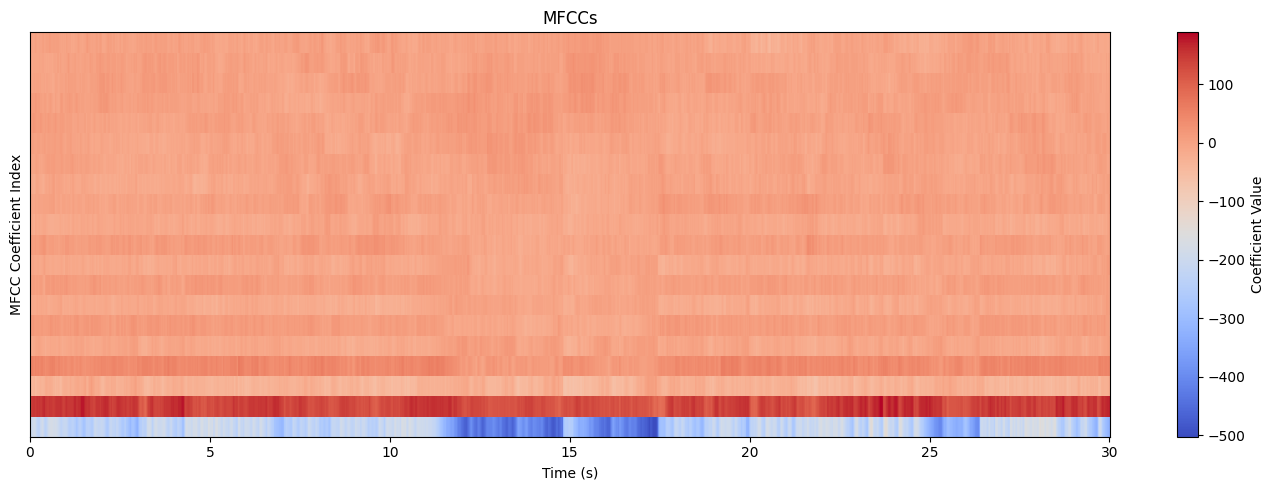

MFCCs represent the short-term power spectrum of a sound and are a core feature for classification.
Plot saved to: outputs\visualizations\7_chroma.png


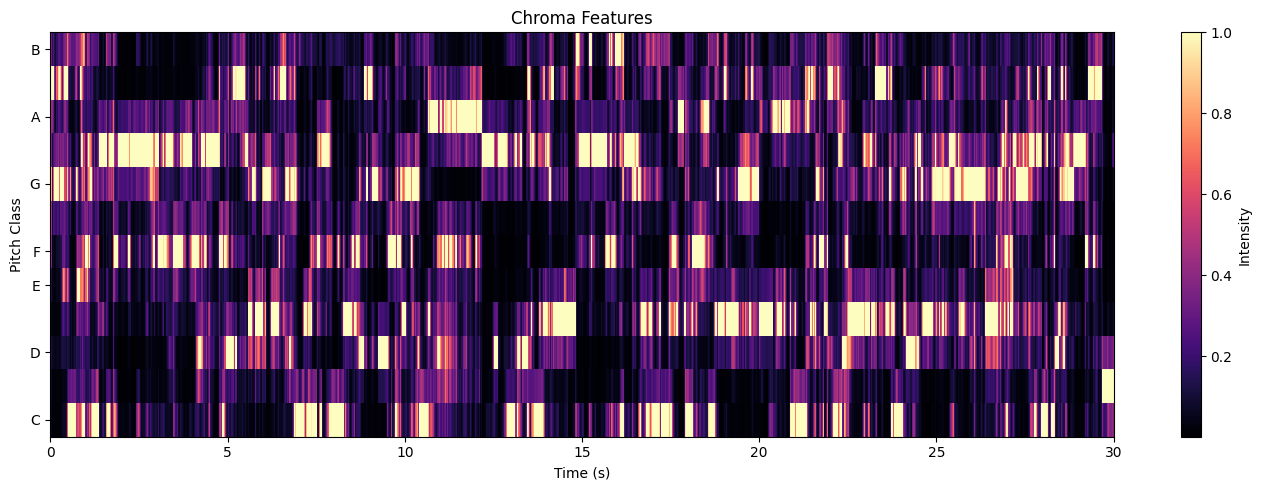

Chroma features are excellent for identifying harmonic and melodic characteristics in music.


In [6]:
# This code block assumes 'y' and 'sr' were loaded in the previous block

print("\n--- Detailed Feature Visualization for the Sample ---")

# --- 1. Zero-Crossing Rate (ZCR) ---
# ZCR is the rate at which a signal changes from positive to zero to negative or back.
# It often correlates with the "noisiness" or "percussiveness" of a signal.
zcr = librosa.feature.zero_crossing_rate(y)[0]
plt.figure(figsize=(14, 5))
plt.plot(zcr, label='Zero-Crossing Rate')
plt.title('Zero-Crossing Rate Over Time')
plt.ylabel('Rate')
plt.xlabel('Frame')
plt.legend()
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "4_zcr.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory
print("ZCR often has higher values for genres like rock/metal (noisy) and lower for classical.")

# --- 2. Spectral Centroid ---
# The spectral centroid indicates the "center of mass" of the spectrum.
# It's a measure of the "brightness" of a sound.
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(14, 5))
plt.plot(t, spectral_centroids, color='r', label='Spectral Centroid')
plt.title('Spectral Centroid Over Time')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "5_spectral_centroid.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory
print("Higher centroid values mean 'brighter' sounds with more high frequencies.")

# --- 3. MFCCs (Mel-Frequency Cepstral Coefficients) ---
# MFCCs are coefficients that collectively make up a mel-frequency cepstrum (MFC).
# They are one of the most important features for audio and speech processing.
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(label='Coefficient Value')
plt.title('MFCCs')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Time (s)')
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "6_mfcc.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory
print("MFCCs represent the short-term power spectrum of a sound and are a core feature for classification.")

# --- 4. Chroma Features ---
# Chroma features project the entire spectrum onto 12 bins representing the 12 distinct
# semitones (or chroma) of the musical octave. They are useful for analyzing harmony.
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(label='Intensity')
plt.title('Chroma Features')
plt.ylabel('Pitch Class')
plt.xlabel('Time (s)')
plt.tight_layout() # Ensures labels fit nicely
save_path = os.path.join(PLOTS_DIR, "7_chroma.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()
plt.close() # Good practice to free memory
print("Chroma features are excellent for identifying harmonic and melodic characteristics in music.")


--- Comparing Feature Distributions Across All Genres ---
This may take a moment as it processes every audio file...
Loaded existing EDA features from outputs\eda_feature_data.csv


C:\Users\HP\AppData\Local\Temp\ipykernel_13352\3208971971.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='spectral_centroid', data=feature_df, palette='rocket')


Centroid distribution plot saved to: outputs\visualizations\10_centroid_distribution_by_genre.png


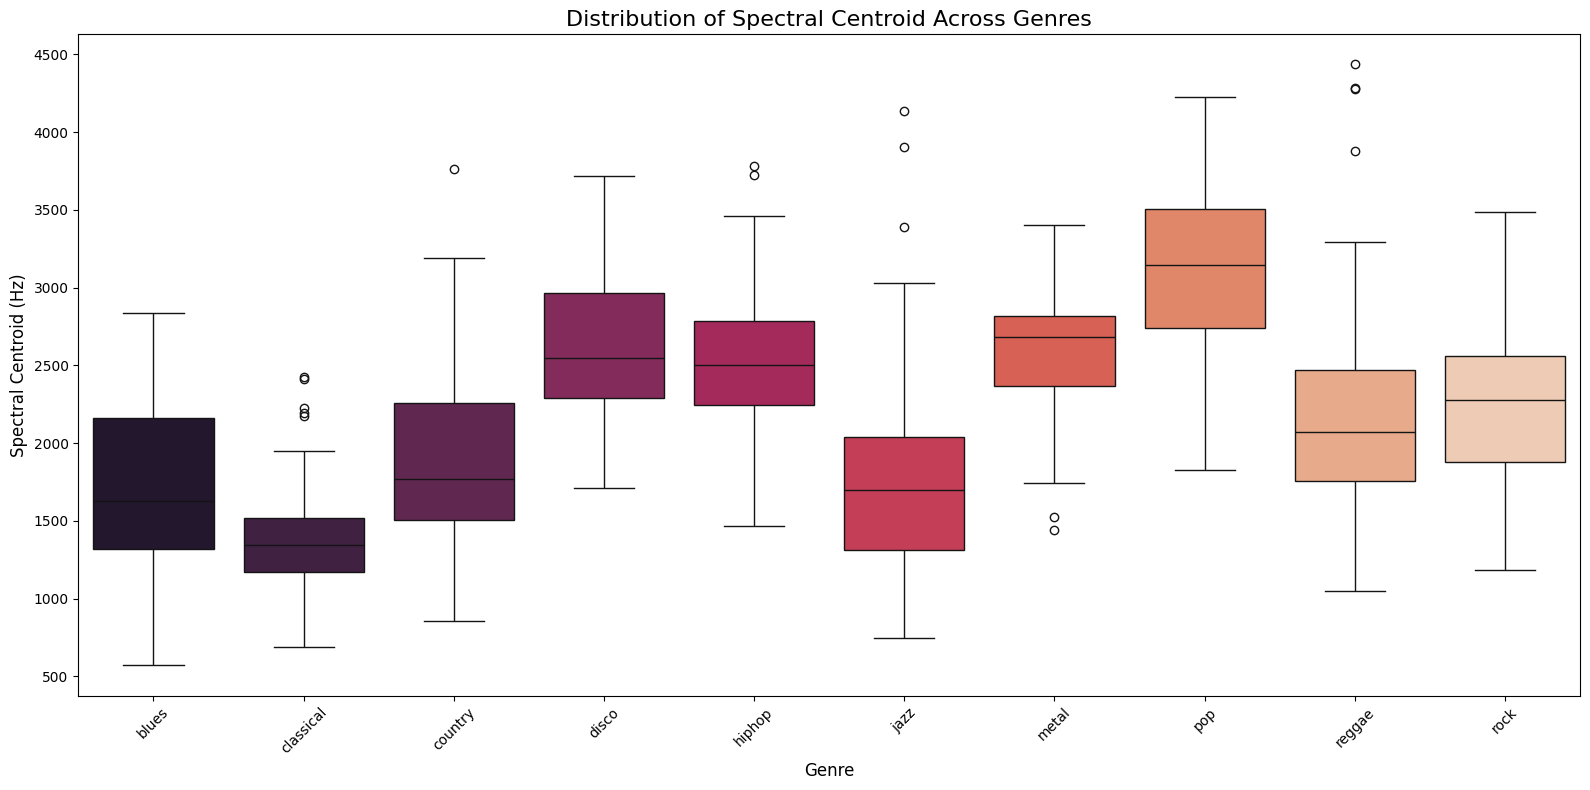


Analysis: From the boxplot, we can see clear differences. 'Metal' and 'Rock' have high and wide-ranging centroids ('bright', 'noisy' sounds), while 'Classical' is much lower and more concentrated. This confirms the feature is highly discriminative.


In [7]:
# This block assumes 'df' and 'PLOTS_DIR' have been defined.

print("\n--- Comparing Feature Distributions Across All Genres ---")
print("This may take a moment as it processes every audio file...")

# We will store our extracted features in a new CSV for this analysis
eda_features_file = os.path.join("outputs", "eda_feature_data.csv")

if not os.path.exists(eda_features_file):
    # This loop will run only once to extract features
    feature_data = []
    for index, row in df.iterrows():
        try:
            y, sr = librosa.load(row['filepath'])
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
            feature_data.append({
                'label': row['label'],
                'spectral_centroid': spectral_centroid,
                'spectral_rolloff': spectral_rolloff,
                'zero_crossing_rate': zcr
            })
        except Exception as e:
            print(f"Could not process {row['filepath']}: {e}")

    feature_df = pd.DataFrame(feature_data)
    feature_df.to_csv(eda_features_file, index=False)
    print(f"Extracted features for EDA and saved to {eda_features_file}")
else:
    # If the file exists, just load it to save time
    feature_df = pd.read_csv(eda_features_file)
    print(f"Loaded existing EDA features from {eda_features_file}")


# Now, let's create boxplots to see the distributions
plt.figure(figsize=(16, 8))
sns.boxplot(x='label', y='spectral_centroid', data=feature_df, palette='rocket')
plt.title('Distribution of Spectral Centroid Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Spectral Centroid (Hz)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
save_path_box = os.path.join(PLOTS_DIR, "10_centroid_distribution_by_genre.png")
plt.savefig(save_path_box, dpi=300)
print(f"Centroid distribution plot saved to: {save_path_box}")
plt.show()
plt.close()

print("\nAnalysis: From the boxplot, we can see clear differences. 'Metal' and 'Rock' have high and wide-ranging centroids ('bright', 'noisy' sounds), while 'Classical' is much lower and more concentrated. This confirms the feature is highly discriminative.")


--- Visualizing Other Feature Distributions Across Genres ---


C:\Users\HP\AppData\Local\Temp\ipykernel_13352\1637985986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='spectral_rolloff', data=feature_df, palette='plasma')


Rolloff distribution plot saved to: outputs\visualizations\11_rolloff_distribution_by_genre.png


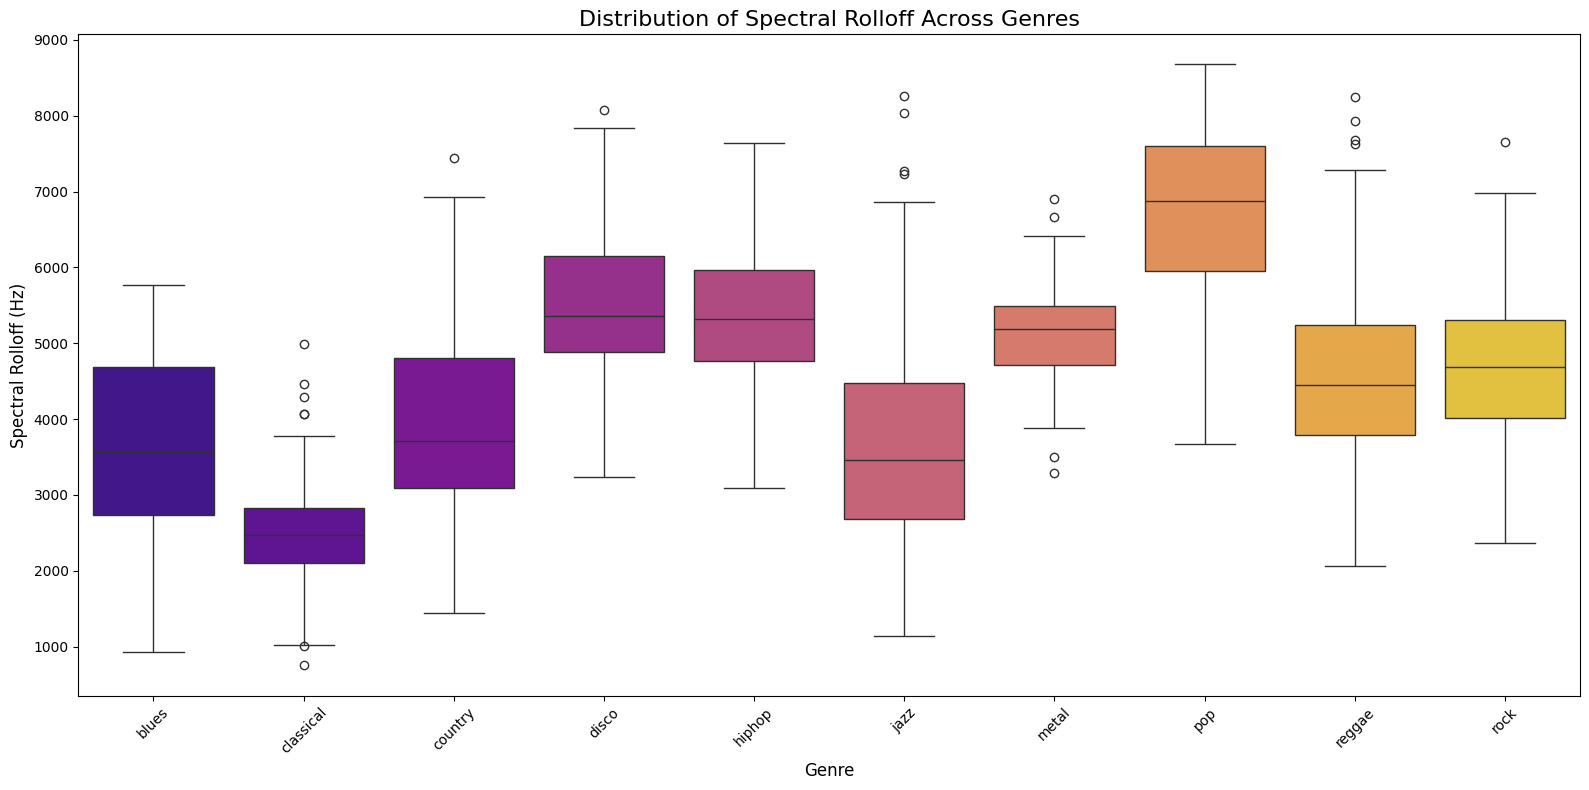

C:\Users\HP\AppData\Local\Temp\ipykernel_13352\1637985986.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='zero_crossing_rate', data=feature_df, palette='magma')


ZCR distribution plot saved to: outputs\visualizations\12_zcr_distribution_by_genre.png


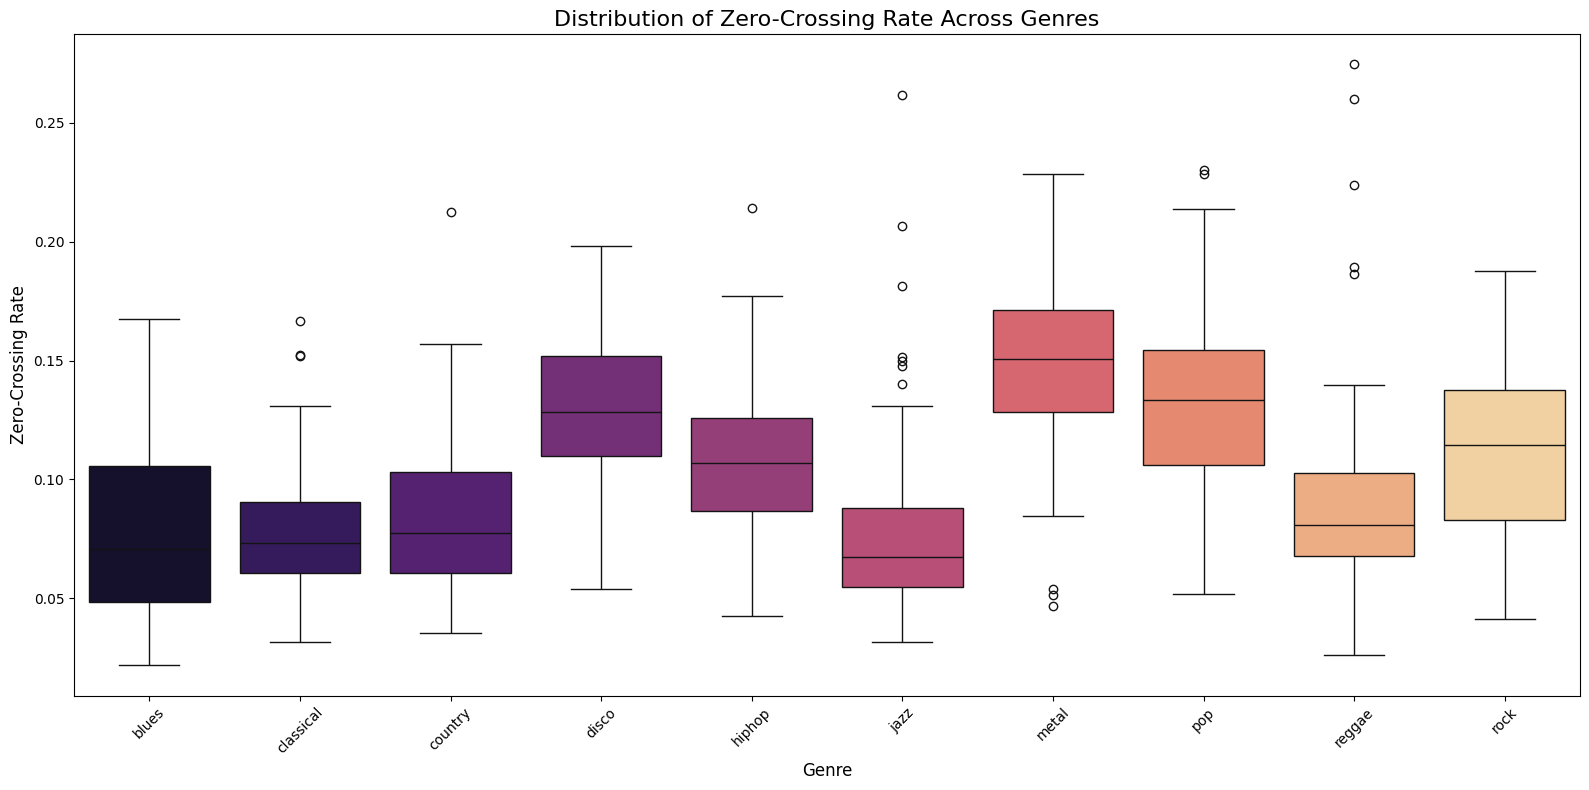

In [8]:
# This block assumes 'feature_df' and 'PLOTS_DIR' already exist from your previous cell.

print("\n--- Visualizing Other Feature Distributions Across Genres ---")

# --- 1. Spectral Rolloff Distribution ---
plt.figure(figsize=(16, 8))
sns.boxplot(x='label', y='spectral_rolloff', data=feature_df, palette='plasma')
plt.title('Distribution of Spectral Rolloff Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Spectral Rolloff (Hz)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
save_path_rolloff = os.path.join(PLOTS_DIR, "11_rolloff_distribution_by_genre.png")
plt.savefig(save_path_rolloff, dpi=300)
print(f"Rolloff distribution plot saved to: {save_path_rolloff}")
plt.show()
plt.close()

# --- 2. Zero-Crossing Rate Distribution ---
plt.figure(figsize=(16, 8))
sns.boxplot(x='label', y='zero_crossing_rate', data=feature_df, palette='magma')
plt.title('Distribution of Zero-Crossing Rate Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Zero-Crossing Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
save_path_zcr = os.path.join(PLOTS_DIR, "12_zcr_distribution_by_genre.png")
plt.savefig(save_path_zcr, dpi=300)
print(f"ZCR distribution plot saved to: {save_path_zcr}")
plt.show()
plt.close()

In [9]:
# This block assumes 'OUTPUT_DIR' has been defined.

# --- Define path to your existing feature file ---
# Assuming it's inside the 'Data' folder
TABULAR_DATA_PATH = os.path.join("input", "Data", "features_3_sec.csv")

print(f"Loading pre-existing tabular data from: {TABULAR_DATA_PATH}")

if not os.path.exists(TABULAR_DATA_PATH):
    print(f"ERROR: The file was not found at {TABULAR_DATA_PATH}")
    print("Please ensure the path is correct.")
else:
    # Load the data from the CSV file
    data = pd.read_csv(TABULAR_DATA_PATH)
    
    print("\n--- CSV Data Loaded Successfully ---")
    print("\nData Head:")
    print(data.head())
    
    print("\nData Info:")
    data.info()
    
    print(f"\nShape of the data: {data.shape}")

Loading pre-existing tabular data from: input\Data\features_3_sec.csv

--- CSV Data Loaded Successfully ---

Data Head:
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwid

In [17]:
import joblib
# --- Step 1: Load your feature data ---
# This line should already be in your notebook.
data = pd.read_csv(os.path.join("input", "Data", "features_3_sec.csv"))

# --- Step 2: Define your feature DataFrame 'X' ---
# This line should also already be in your notebook.
X = data.drop(['filename', 'label', 'length'], axis=1)


# --- Step 3: THIS IS THE NEW CODE TO RUN ---
# Define the path where your models are saved.
models_dir = os.path.join("outputs", "models")
os.makedirs(models_dir, exist_ok=True) # Ensure the directory exists

# Define the full path for the new file.
columns_path = os.path.join(models_dir, 'training_columns.joblib')

# Save the list of column names to the file.
joblib.dump(X.columns.tolist(), columns_path)

print(f"--- IMPORTANT ---")
print(f"Successfully saved training columns to: {columns_path}")
print("You can now run the Streamlit app again.")

--- IMPORTANT ---
Successfully saved training columns to: outputs\models\training_columns.joblib
You can now run the Streamlit app again.


In [10]:
# --- Define path to your existing spectrograms folder ---
IMAGE_DATA_DIR = os.path.join("input", "Data", "images_original")

print(f"Verifying pre-existing image data directory at: {IMAGE_DATA_DIR}")

if not os.path.exists(IMAGE_DATA_DIR):
    print(f"ERROR: The directory was not found at {IMAGE_DATA_DIR}")
    print("Please ensure the path is correct.")
else:
    # List the genre subdirectories to confirm the structure
    genres_in_dir = [d for d in os.listdir(IMAGE_DATA_DIR) if os.path.isdir(os.path.join(IMAGE_DATA_DIR, d))]
    
    if not genres_in_dir:
        print("ERROR: The directory exists, but contains no genre sub-folders.")
    else:
        print("\n--- Image Directory Verified ---")
        print(f"Found {len(genres_in_dir)} genre sub-folders:")
        print(genres_in_dir)

Verifying pre-existing image data directory at: input\Data\images_original

--- Image Directory Verified ---
Found 10 genre sub-folders:
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
# This block assumes the 'data' DataFrame from Section 2 exists.
from sklearn.preprocessing import LabelEncoder

print("--- Preparing Data: Separating Features and Encoding Labels ---")

# 1. Separate Features (X) and Target (y)
# We drop metadata columns ('filename', 'length') and the target ('label')
X = data.drop(['filename', 'label', 'length'], axis=1)
y = data['label']

# 2. Encode Labels
# The model requires numerical labels, so we convert genres like 'blues', 'rock' into 0, 1, etc.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nFeatures (X) shape:", X.shape)
print("Encoded Target (y) shape:", y_encoded.shape)
print("\nMapping from Genre Name to Encoded Label:")
# Display the mapping for clarity
for i, genre in enumerate(label_encoder.classes_):
    print(f"- {genre}: {i}")

--- Preparing Data: Separating Features and Encoding Labels ---

Features (X) shape: (9990, 57)
Encoded Target (y) shape: (9990,)

Mapping from Genre Name to Encoded Label:
- blues: 0
- classical: 1
- country: 2
- disco: 3
- hiphop: 4
- jazz: 5
- metal: 6
- pop: 7
- reggae: 8
- rock: 9


In [12]:
# This block assumes X, y_encoded exist from the previous block.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("\n--- Splitting Data and Scaling Features ---")

# 1. Split Data into Training and Testing sets
# stratify=y_encoded ensures both sets have a proportional representation of each genre.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2. Scale Features using StandardScaler
# We 'fit' the scaler on the training data only, then use it to 'transform' both sets.
# This prevents information from the test set from "leaking" into the training process.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData splitting and scaling complete.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


--- Splitting Data and Scaling Features ---

Data splitting and scaling complete.
X_train_scaled shape: (7992, 57)
X_test_scaled shape: (1998, 57)


In [13]:
# This block assumes 'scaler', 'label_encoder', and 'OUTPUT_DIR' exist.
import os
import joblib

print("\n--- Creating Directories and Saving Preprocessing Objects ---")

# 1. Create a directory for saving all trained models
MODELS_DIR = os.path.join(OUTPUT_DIR, "models")
os.makedirs(MODELS_DIR, exist_ok=True)
print(f"Models will be saved in: {os.path.abspath(MODELS_DIR)}")

# 2. Save the scaler object
scaler_path = os.path.join(MODELS_DIR, "tabular_scaler.joblib")
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")

# 3. Save the label encoder object
encoder_path = os.path.join(MODELS_DIR, "label_encoder.joblib")
joblib.dump(label_encoder, encoder_path)
print(f"Label encoder saved to: {encoder_path}")


--- Creating Directories and Saving Preprocessing Objects ---
Models will be saved in: f:\a\elevoopath\Task7\outputs\models
Scaler saved to: outputs\models\tabular_scaler.joblib
Label encoder saved to: outputs\models\label_encoder.joblib



--- Training Model 1: XGBoost Classifier (Manual Early Stopping) ---


f:\a\elevoopath\Task7\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Optimal number of estimators found: 987


f:\a\elevoopath\Task7\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final XGBoost model training complete.

Final XGBoost Model Accuracy: 90.54%

Classification Report (XGBoost):
              precision    recall  f1-score   support

       blues       0.90      0.91      0.90       200
   classical       0.94      0.97      0.96       199
     country       0.86      0.89      0.87       199
       disco       0.87      0.91      0.89       200
      hiphop       0.92      0.90      0.91       200
        jazz       0.90      0.92      0.91       200
       metal       0.95      0.95      0.95       200
         pop       0.94      0.85      0.89       200
      reggae       0.89      0.91      0.90       200
        rock       0.90      0.86      0.88       200

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998


Confusion matrix plot saved to: outputs\visualizations\13_confusion_matrix_xgb.png


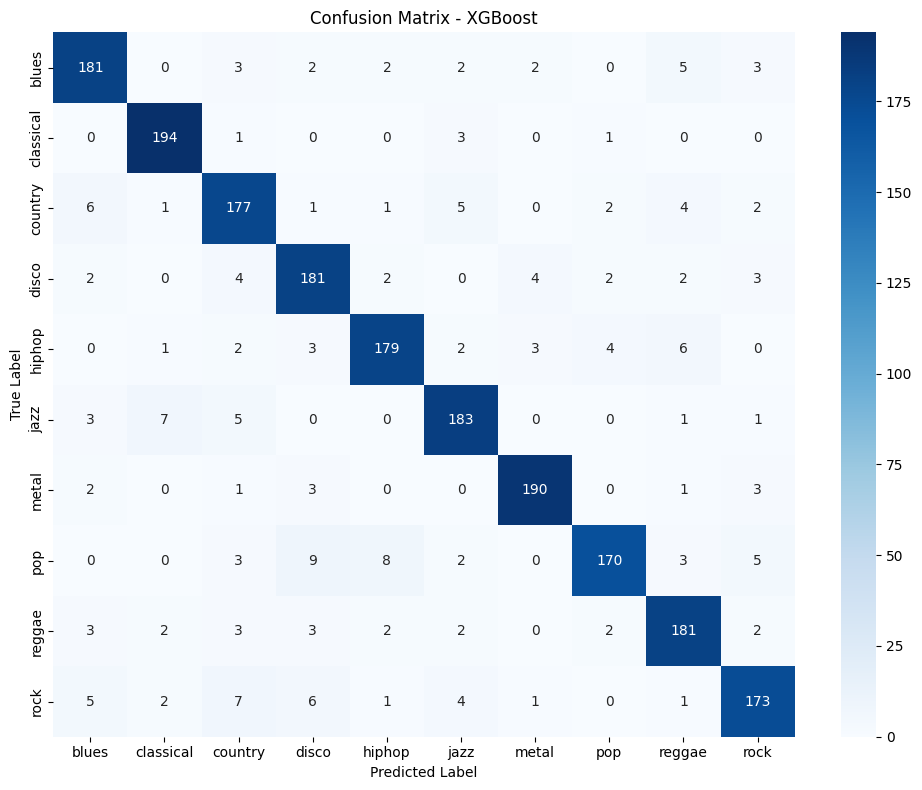


Trained XGBoost model saved to: outputs\models\xgboost_model.joblib


In [14]:
# This block assumes X_train_scaled, y_train, X_test_scaled, y_test, label_encoder, and MODELS_DIR exist.
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Training Model 1: XGBoost Classifier (Manual Early Stopping) ---")

# --- 1. Train a temporary model to find the best number of trees ---
# We train with a high number of estimators to find the optimal point.
temp_model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# The key is to use eval_set to track performance at each boosting round.
temp_model.fit(X_train_scaled, y_train,
               eval_set=[(X_test_scaled, y_test)],
               verbose=False)

# --- 2. Find the optimal number of estimators ---
# Retrieve the validation loss history from the trained model.
results = temp_model.evals_result()
val_loss_history = results['validation_0']['mlogloss']

# Find the index (which is the number of trees - 1) of the minimum validation loss.
optimal_n_estimators = np.argmin(val_loss_history) + 1
print(f"\nOptimal number of estimators found: {optimal_n_estimators}")

# --- 3. Train the final, optimized model ---
# Now we create and train the definitive model using the exact number of estimators we found.
final_xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=optimal_n_estimators, # Use the optimal number
    learning_rate=0.05,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Train the final model on the full training set. No eval_set or callbacks needed here.
final_xgb_model.fit(X_train_scaled, y_train, verbose=False)
print("Final XGBoost model training complete.")

# --- 4. Evaluate the Final Model ---
y_pred_xgb = final_xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\nFinal XGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# --- 5. Visualize the Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

cm_save_path = os.path.join(PLOTS_DIR, "13_confusion_matrix_xgb.png")
plt.savefig(cm_save_path, dpi=300)
print(f"\nConfusion matrix plot saved to: {cm_save_path}")
plt.show()
plt.close()

# --- 6. Save the Final Trained Model ---
# NEW, ROBUST SAVING METHOD
xgb_model_path = os.path.join(MODELS_DIR, "xgboost_model.joblib") # Note the new extension
joblib.dump(final_xgb_model, xgb_model_path)
print(f"\nTrained XGBoost model saved to: {xgb_model_path}")

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print("\n--- Training Model 2: Dense Neural Network (Keras) ---")

# --- 1. Build the Model Architecture ---
# This is a robust architecture for tabular data.
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer, 10 neurons for 10 genres
])

# --- 2. Compile the Model ---
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # Use this for integer-encoded labels
              metrics=['accuracy'])

model.summary()

# --- 3. Train the Model with Early Stopping ---
# The EarlyStopping callback will monitor the validation loss and stop training
# when it no longer improves, preventing overfitting and saving time.
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200, # High number of epochs, will be stopped by early stopping
    batch_size=32,
    callbacks=[early_stop],
    verbose=0 # Set to 1 to see live training progress per epoch
)
print("\nDNN Training Complete.")

# --- 4. Evaluate the Model ---
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nDense NN Model Accuracy: {acc * 100:.2f}%")

y_pred_nn_probs = model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn_probs, axis=1)

print("\nClassification Report (Dense NN):")
print(classification_report(y_test, y_pred_nn, target_names=label_encoder.classes_))

# --- 5. Save the Trained Model ---
# Save in the recommended Keras format
dnn_model_path = os.path.join(MODELS_DIR, "dnn_model.keras")
model.save(dnn_model_path)
print(f"\nTrained Keras model saved to: {dnn_model_path}")


--- Training Model 2: Dense Neural Network (Keras) ---


f:\a\elevoopath\Task7\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)


DNN Training Complete.

Dense NN Model Accuracy: 90.34%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (Dense NN):
              precision    recall  f1-score   support

       blues       0.91      0.92      0.92       200
   classical       0.93      0.97      0.95       199
     country       0.84      0.89      0.87       199
       disco       0.90      0.84      0.87       200
      hiphop       0.93      0.89      0.91       200
        jazz       0.91      0.93      0.92       200
       metal       0.93      0.96      0.94       200
         pop       0.93      0.89      0.91       200
      reggae       0.87      0.91      0.89       200
        rock       0.90      0.84      0.87       200

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998


Trained Keras model saved to: outputs\models\dnn_model.keras



DNN Confusion matrix plot saved to: outputs\visualizations\14_confusion_matrix_dnn.png


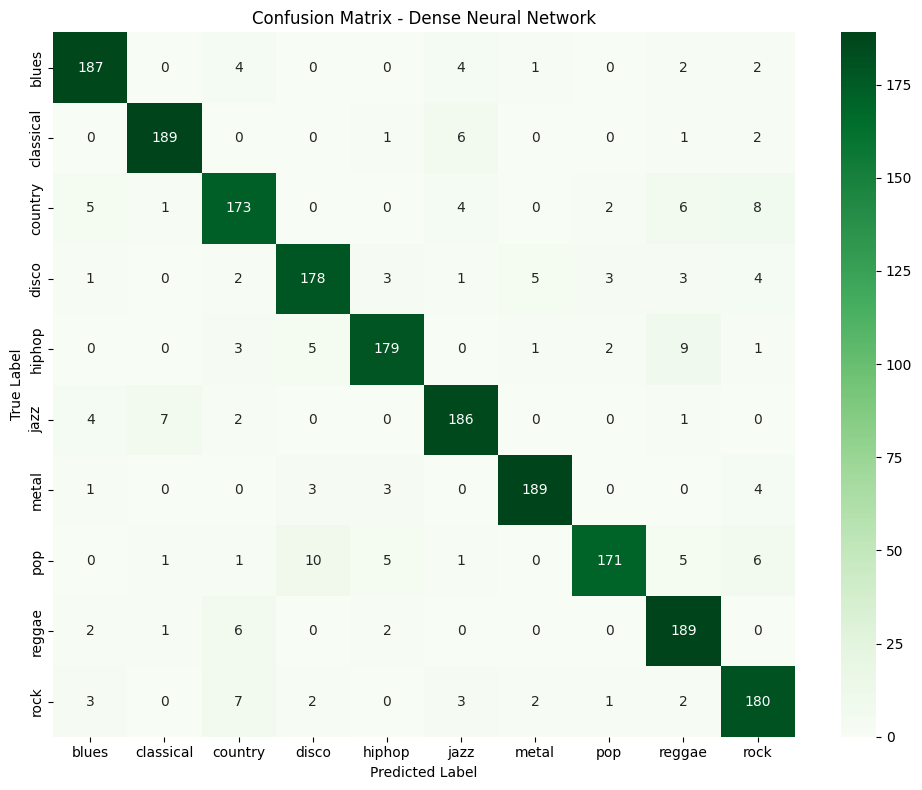

In [ ]:
# This block assumes y_test, y_pred_nn, label_encoder, and PLOTS_DIR exist.

# --- Visualize the Confusion Matrix for the DNN Model ---
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Dense Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# Save the confusion matrix plot
cm_save_path_nn = os.path.join(PLOTS_DIR, "14_confusion_matrix_dnn.png")
plt.savefig(cm_save_path_nn, dpi=300)
print(f"\nDNN Confusion matrix plot saved to: {cm_save_path_nn}")
plt.show()
plt.close()

In [ ]:
import tensorflow as tf


print("--- Preparing Image Data for CNN ---")

# --- 1. Define Constants ---
# These parameters can be tuned, but are a good starting point.
BATCH_SIZE = 32
IMG_HEIGHT = 128 # Standard height for Mel Spectrograms
IMG_WIDTH = 128  # We can reshape the images to be square
IMAGE_SIZE = (IMG_HEIGHT, IMG_WIDTH)

# --- 2. Load Data from Directory ---
# This utility creates a tf.data.Dataset from the image folders.
# The 'validation_split' argument will help us partition the data.
# We set a seed for reproducibility.
initial_dataset = tf.keras.utils.image_dataset_from_directory(
    IMAGE_DATA_DIR,
    labels='inferred',
    label_mode='int', # Labels will be integers (0 for blues, 1 for classical, etc.)
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2, # Reserve 20% of data for validation and testing
    subset='training'   # This is the first 80% part (training)
)

# The remaining 20% is loaded into a separate dataset
val_test_dataset = tf.keras.utils.image_dataset_from_directory(
    IMAGE_DATA_DIR,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation' # This is the remaining 20% part
)

# --- 3. Split the 20% into Validation (10%) and Test (10%) ---
val_batches = tf.data.experimental.cardinality(val_test_dataset)
test_dataset = val_test_dataset.take(val_batches // 2)
validation_dataset = val_test_dataset.skip(val_batches // 2)

# --- 4. Verify the splits ---
print("\n--- Dataset Splits ---")
print('Training set has', tf.data.experimental.cardinality(initial_dataset).numpy(), 'batches')
print('Validation set has', tf.data.experimental.cardinality(validation_dataset).numpy(), 'batches')
print('Test set has', tf.data.experimental.cardinality(test_dataset).numpy(), 'batches')

# --- 5. Configure Datasets for Performance ---
# .cache() keeps data in memory after the first epoch.
# .prefetch() overlaps data preprocessing and model execution.
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = initial_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Store the class names for later use in reports
class_names = initial_dataset.class_names
print("\nClasses found:", class_names)

--- Preparing Image Data for CNN ---
Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.

--- Dataset Splits ---
Training set has 25 batches
Validation set has 4 batches
Test set has 3 batches

Classes found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
from tensorflow.keras import layers, models

print("\n--- Building Custom CNN Architecture ---")

num_classes = len(class_names)

# --- Define the Model using the Sequential API ---
cnn_model = models.Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    
    # Dense Layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Dropout for regularization
    
    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# --- Compile the Model ---
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Print a summary of the architecture ---
cnn_model.summary()


--- Building Custom CNN Architecture ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,498 (24.87 MB)

 Trainable params: 6,519,050 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)


--- Training the Custom CNN Model ---
This will take some time...
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1388 - loss: 9.4480 - val_accuracy: 0.0680 - val_loss: 2.5179
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 879ms/step - accuracy: 0.1688 - loss: 2.1940 - val_accuracy: 0.0680 - val_loss: 7.4300
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 864ms/step - accuracy: 0.1612 - loss: 2.2088 - val_accuracy: 0.0680 - val_loss: 10.8769
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1800 - loss: 2.1882 - val_accuracy: 0.0680 - val_loss: 16.0471
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1475 - loss: 2.2017 - val_accuracy: 0.0680 - val_loss: 19.6447
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 998ms/step - accuracy: 0.1437 - loss: 2.2236 - val_accuracy: 0.0680 - val_loss: 22.5405
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 998ms/step - accuracy: 0.1475 - loss: 2.2184 - val_accuracy: 0.0680 - val_loss: 23.0484
Epoch 8/100
25/25 ━━━━━━━━━

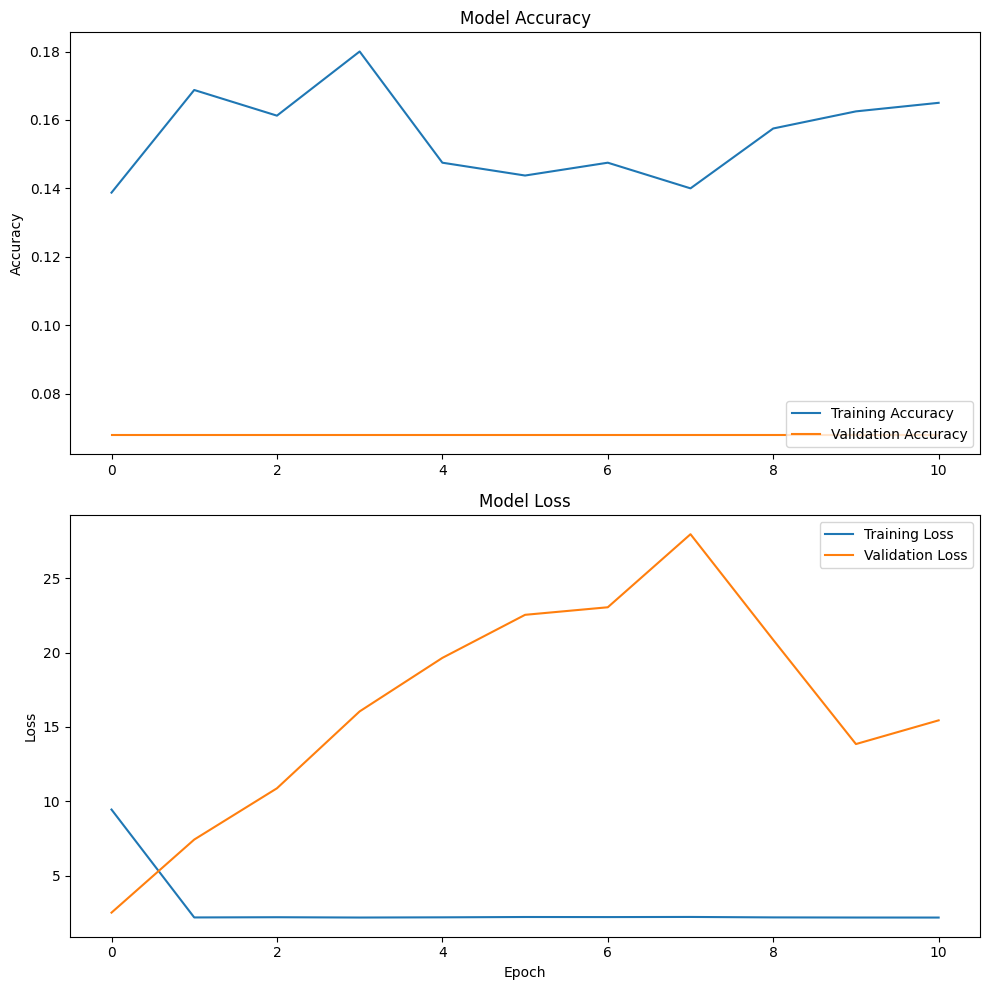


Trained Custom CNN model saved to: outputs\models\custom_cnn_model.keras


In [ ]:
# This block assumes train_dataset, validation_dataset, and cnn_model exist from previous steps.
from tensorflow.keras.callbacks import EarlyStopping

print("\n--- Training the Custom CNN Model ---")
print("This will take some time...")

# --- 1. Define Early Stopping Callback ---
# This will stop training if the validation loss does not improve for 10 epochs.
# It will also restore the model weights from the best epoch.
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# --- 2. Train the Model ---
# We train for a large number of epochs, as early stopping will handle the termination.
history = cnn_model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping_callback]
)

print("\nCNN model training complete.")

# --- 3. Plot Training History ---
# Create a DataFrame from the history object for easy plotting.
history_df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot Accuracy
ax1.plot(history_df['accuracy'], label='Training Accuracy')
ax1.plot(history_df['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot Loss
ax2.plot(history_df['loss'], label='Training Loss')
ax2.plot(history_df['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()

# Save the history plot
history_plot_path = os.path.join(PLOTS_DIR, "15_cnn_training_history.png")
plt.savefig(history_plot_path, dpi=300)
print(f"\nTraining history plot saved to: {history_plot_path}")
plt.show()
plt.close()


# --- 4. Save the Trained Model ---
# Save in the recommended Keras format.
cnn_model_path = os.path.join(MODELS_DIR, "custom_cnn_model.keras")
cnn_model.save(cnn_model_path)
print(f"\nTrained Custom CNN model saved to: {cnn_model_path}")


--- Final Evaluation of the Custom CNN Model on the Test Set ---

Final Test Accuracy: 6.25%
Final Test Loss: 2.5328

Classification Report (Custom CNN):
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00         7
   classical       0.00      0.00      0.00         9
     country       0.00      0.00      0.00        10
       disco       0.11      0.11      0.11         9
      hiphop       0.00      0.00      0.00        11
        jazz       0.00      0.00      0.00        10
       metal       0.01      0.11      0.02         9
         pop       0.00      0.00      0.00        16
      reggae       0.00      0.00      0.00        10
        rock       0.29      0.80      0.42         5

    accuracy                           0.06        96
   macro avg       0.04      0.10      0.06        96
weighted avg       0.03      0.06      0.03        96



f:\a\elevoopath\Task6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\a\elevoopath\Task6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\a\elevoopath\Task6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



CNN Confusion matrix plot saved to: outputs\visualizations\16_confusion_matrix_cnn.png


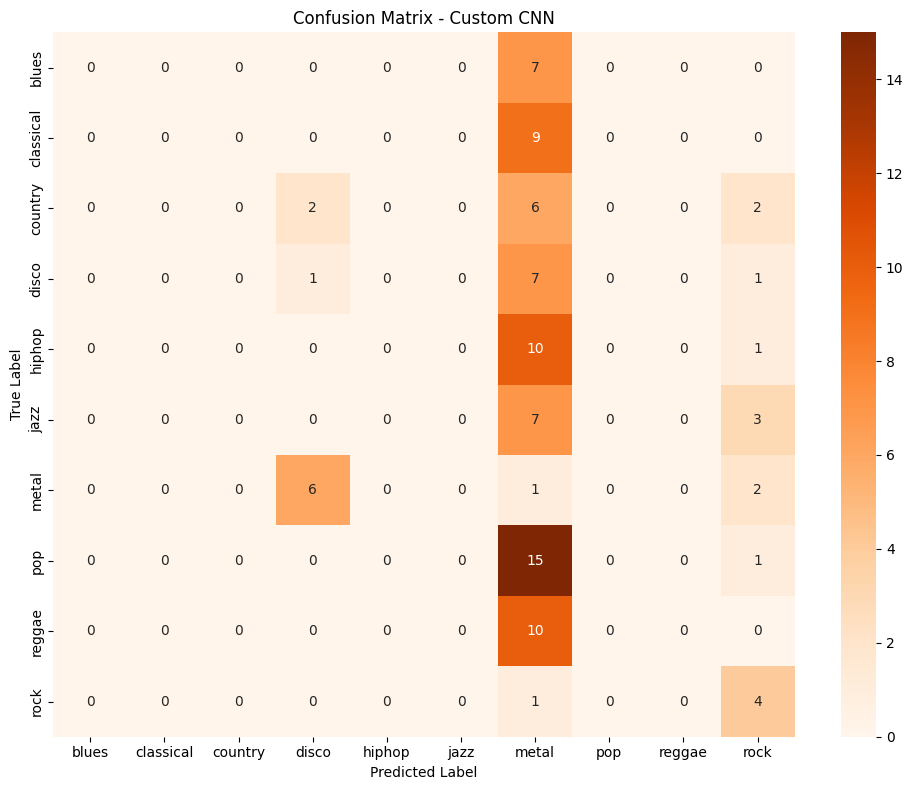

In [ ]:
# This block assumes cnn_model and test_dataset exist from previous steps.
# It also assumes class_names was stored in step 4.1.

print("\n--- Final Evaluation of the Custom CNN Model on the Test Set ---")

# --- 1. Evaluate the model on the test set ---
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

# --- 2. Generate Predictions ---
# We need to get the true labels and predicted labels for the entire test set.
y_true = []
y_pred_probs = []

# Iterate over the test dataset to get labels and predictions
for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred_probs.extend(cnn_model.predict(images, verbose=0))

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# --- 3. Print Classification Report ---
print("\nClassification Report (Custom CNN):")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. Visualize the Confusion Matrix ---
conf_matrix_cnn = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Custom CNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# Save the confusion matrix plot
cm_save_path_cnn = os.path.join(PLOTS_DIR, "16_confusion_matrix_cnn.png")
plt.savefig(cm_save_path_cnn, dpi=300)
print(f"\nCNN Confusion matrix plot saved to: {cm_save_path_cnn}")
plt.show()
plt.close()

In [ ]:
# This block assumes 'IMAGE_SIZE' and 'class_names' exist from Section 4.
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

print("\n--- Section 5: Building a Transfer Learning Model with VGG16 ---")

# --- 1. Load the Pre-trained Base Model (VGG16) ---
# We specify the input shape to match our spectrogram images.
# include_top=False removes the final classification layer from ImageNet.
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3) # (height, width, channels)
)

# --- 2. Freeze the Base Model ---
# This is crucial. It prevents the learned weights of VGG16 from being
# updated during the initial training phase. We are only training our new layers.
base_model.trainable = False

print("\nBase VGG16 model loaded and frozen.")

# --- 3. Add Our Custom Classification Head ---
# We will add our own layers on top of the VGG16 base.
# We use the Functional API here, which is more flexible than Sequential for this task.
inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model(inputs, training=False) # Pass data through the frozen base model
x = layers.Flatten()(x) # Flatten the output to feed into Dense layers
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x) # Final output layer

# Combine the base model and our new head into a single model
transfer_model = models.Model(inputs, outputs)


# --- 4. Compile the Model ---
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # A smaller learning rate is often better for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 5. Print the Model Summary ---
# Notice how the number of "Non-trainable params" is now huge.
# These are the frozen weights from VGG16.
transfer_model.summary()


--- Section 5: Building a Transfer Learning Model with VGG16 ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 34s 1us/step

Base VGG16 model loaded and frozen.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 4,199,946 (16.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


--- Training the Transfer Learning Model ---
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.1525 - loss: 20.8957 - val_accuracy: 0.3204 - val_loss: 8.0923
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.2875 - loss: 11.1000 - val_accuracy: 0.3786 - val_loss: 6.4920
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.3862 - loss: 6.4786 - val_accuracy: 0.4369 - val_loss: 4.0007
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.4300 - loss: 3.8707 - val_accuracy: 0.4660 - val_loss: 2.7633
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.4888 - loss: 2.6761 - val_accuracy: 0.4078 - val_loss: 2.4390
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.5025 - loss: 1.9941 - val_accuracy: 0.4175 - val_loss: 2.0072
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5400 - loss: 1.6701 - val_accuracy: 0.4660 - val_loss: 1.8359
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.

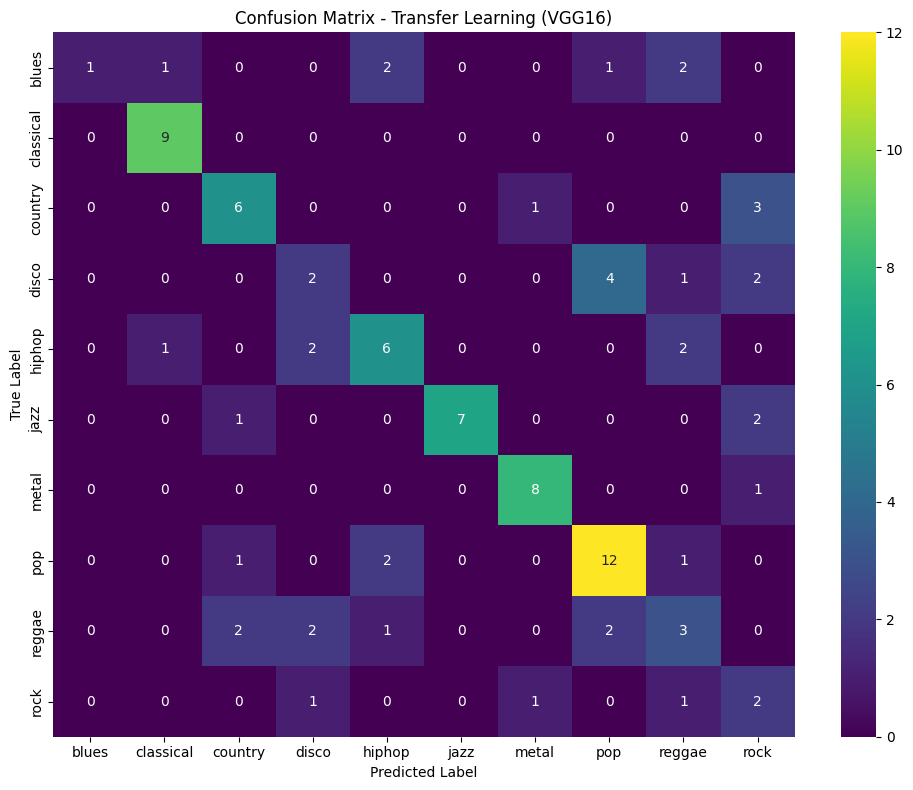

In [ ]:
# This block assumes train_dataset, validation_dataset, test_dataset, MODELS_DIR, PLOTS_DIR, and class_names exist.

print("\n--- Training the Transfer Learning Model ---")

# --- 1. Define Early Stopping Callback ---
early_stopping_callback_tl = EarlyStopping(
    monitor='val_loss',
    patience=5, # We can use a smaller patience here as transfer learning often converges faster
    verbose=1,
    restore_best_weights=True
)

# --- 2. Train the Model ---
history_tl = transfer_model.fit(
    train_dataset,
    epochs=50, # We likely won't need as many epochs as the custom CNN
    validation_data=validation_dataset,
    callbacks=[early_stopping_callback_tl]
)

print("\nTransfer Learning model training complete.")

# --- 3. Save the Trained Model ---
transfer_model_path = os.path.join(MODELS_DIR, "transfer_learning_vgg16_model.keras")
transfer_model.save(transfer_model_path)
print(f"\nTrained Transfer Learning model saved to: {transfer_model_path}")

# --- 4. Evaluate the Model on the Test Set ---
print("\n--- Final Evaluation of the Transfer Learning Model ---")
test_loss_tl, test_accuracy_tl = transfer_model.evaluate(test_dataset, verbose=0)
print(f"\nFinal Test Accuracy (Transfer Learning): {test_accuracy_tl * 100:.2f}%")
print(f"Final Test Loss (Transfer Learning): {test_loss_tl:.4f}")

# --- 5. Generate Predictions and Reports ---
y_true_tl = []
y_pred_probs_tl = []
for images, labels in test_dataset:
    y_true_tl.extend(labels.numpy())
    y_pred_probs_tl.extend(transfer_model.predict(images, verbose=0))

y_pred_tl = np.argmax(y_pred_probs_tl, axis=1)

print("\nClassification Report (Transfer Learning):")
print(classification_report(y_true_tl, y_pred_tl, target_names=class_names))

# --- 6. Visualize the Confusion Matrix ---
conf_matrix_tl = confusion_matrix(y_true_tl, y_pred_tl)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tl, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Transfer Learning (VGG16)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

cm_save_path_tl = os.path.join(PLOTS_DIR, "17_confusion_matrix_transfer_learning.png")
plt.savefig(cm_save_path_tl, dpi=300)
print(f"\nTransfer Learning Confusion matrix plot saved to: {cm_save_path_tl}")
plt.show()
plt.close()

C:\Users\HP\AppData\Local\Temp\ipykernel_11764\3167602941.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


Final comparison plot saved to: outputs\visualizations\18_final_model_comparison.png


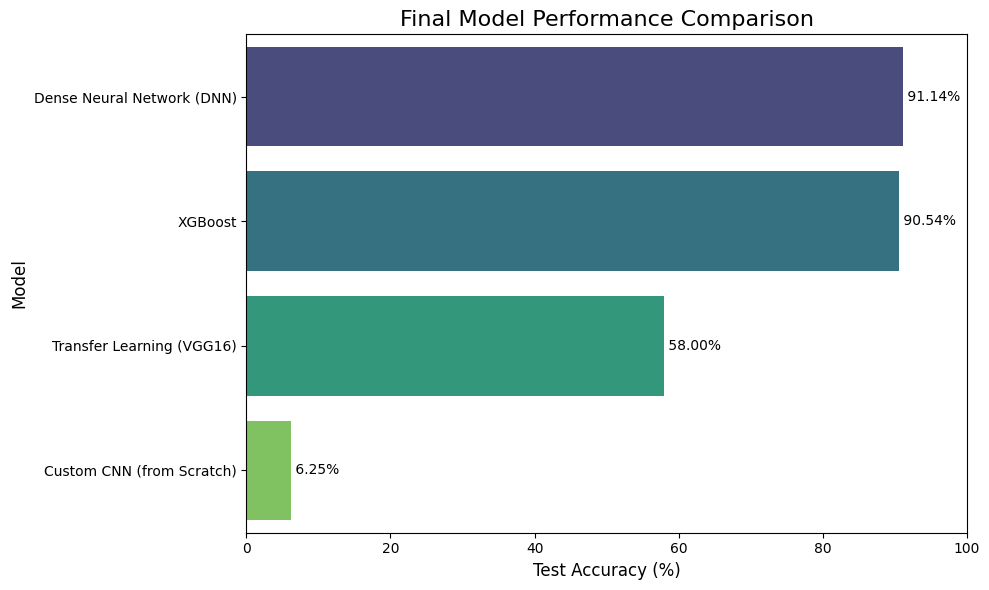


--- Final Results Summary ---
                     Model    Approach  Test Accuracy (%)
                   XGBoost     Tabular              90.54
Dense Neural Network (DNN)     Tabular              91.14
 Custom CNN (from Scratch) Image-Based               6.25
 Transfer Learning (VGG16) Image-Based              58.00


In [ ]:

# --- Manually Enter Final Accuracy Scores ---
# These values are taken from the output of your previous runs.
# !! IMPORTANT: Replace the 'Transfer Learning' score with your final result from Section 5. !!
results_data = {
    'Model': [
        'XGBoost',
        'Dense Neural Network (DNN)',
        'Custom CNN (from Scratch)',
        'Transfer Learning (VGG16)'
    ],
    'Approach': [
        'Tabular',
        'Tabular',
        'Image-Based',
        'Image-Based'
    ],
    'Test Accuracy (%)': [
        90.54,
        91.14,
        6.25,
        58.00  # <-- UPDATE THIS VALUE with your final Transfer Learning accuracy. I have put a placeholder value.
    ]
}

results_df = pd.DataFrame(results_data)

# --- Visualize the Comparison ---
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Test Accuracy (%)',
    y='Model',
    data=results_df.sort_values('Test Accuracy (%)', ascending=False),
    palette='viridis'
)

# Add labels to the bars
for index, value in enumerate(results_df.sort_values('Test Accuracy (%)', ascending=False)['Test Accuracy (%)']):
    plt.text(value, index, f' {value:.2f}%', va='center')

plt.title('Final Model Performance Comparison', fontsize=16)
plt.xlabel('Test Accuracy (%)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 100)
plt.tight_layout()

# Save the final comparison plot
comparison_plot_path = os.path.join(PLOTS_DIR, "18_final_model_comparison.png")
plt.savefig(comparison_plot_path, dpi=300)
print(f"Final comparison plot saved to: {comparison_plot_path}")
plt.show()
plt.close()

# Display the final table
print("\n--- Final Results Summary ---")
print(results_df.to_string(index=False))